![Elevvo Pathways](https://elevvo.tech/assets/nav_logo-5vkEKoZL.svg)
<h1>Data Cleaning and Insight Generation from Survey Data</h1>

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
df = pd.read_csv('dataset.csv', encoding='utf-8', low_memory=False)
df.head()

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We notice that the dataset contains 200+ rows, and many features in the dataset have NaN values which will hinder our EDA process.
Therefore, we will initally pre-process the dataset to drop duplicates and remove rows and columns which all contain NaN values.

In [215]:
df.drop_duplicates(inplace=True)
df.dropna(how='all', axis=0, inplace=True)
df.dropna(how='all', axis=1, inplace=True)

Analysing the columns of the dataset, we find that the first eight questions in the survery are very important in our EDA step, so we will ensure that all required fields have no NaN values at all.

In [216]:
df.dropna(how='any', subset=list(df.columns)[0:8], inplace=True)

Since the very first row in the dataset contains questions (which have an <code>object</code> dtype), this will hinder our ability to apply valid dtypes to each column. Therefore, we will remove it entirely and turn it into our headers (to know what the question asks).

In [217]:
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df = df[1:]

In [218]:
df['What is your gender? - Selected Choice'].unique()

array(['Man', 'Woman', 'Nonbinary', 'Prefer not to say',
       'Prefer to self-describe', 'Male', 'Female'], dtype=object)

The gender question contains many iterations of the same word (i.e Male -> Man, Female -> Woman).
This will display inaccurate information when we plot our graph in the future. Therefore, we must replace all occurances.

In [219]:
gender_map = {
    'Man': 'Male',
    'Male': 'Male',
    'Woman': 'Female',
    'Female': 'Female',
    'Nonbinary': 'Non-binary',
    'Non-binary, genderqueer, or gender non-conforming': 'Non-binary',
    'A different identity': 'Other',
    'Prefer to self-describe': 'Other',
    'Prefer not to say': 'Prefer not to say'
}

df['What is your gender? - Selected Choice'] = df['What is your gender? - Selected Choice'].map(lambda x: gender_map.get(x, 'Other'))
df['What is your gender? - Selected Choice'].unique()

array(['Male', 'Female', 'Non-binary', 'Prefer not to say', 'Other'],
      dtype=object)

In [220]:
df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].unique()

array(['Masterâ€™s degree', 'Doctoral degree', 'I prefer not to answer',
       'Some college/university study without earning a bachelorâ€™s degree',
       'Bachelorâ€™s degree', 'No formal education past high school',
       'Professional doctorate', 'Professional degree'], dtype=object)

The above seems to be valid, however there are some encoding issues where the apostrophe is incorrectly rendered. Therefore we remove the apostrophe. Keep in mind, this step is optional and we could have continued in our EDA process without consulting this issue.

In [221]:
education_map = {
    'Masterâ€™s degree': 'Masters degree',
    'Bachelorâ€™s degree': 'Bachelors degree',
    'Some college/university study without earning a bachelorâ€™s degree': 'Persuing a degree',
    'No formal education past high school': 'No formal education past high school',
    'Professional degree': 'Professional degree',
    'Doctoral degree': 'Doctoral degree',
    'Professional doctorate': 'Professional doctorate'
}

df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'] = df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].map(lambda x: education_map.get(x, 'Other'))
df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].unique()

array(['Masters degree', 'Doctoral degree', 'Other', 'Persuing a degree',
       'Bachelors degree', 'No formal education past high school',
       'Professional doctorate', 'Professional degree'], dtype=object)

The below field contains a duplicate (A personal computer / desktop and A personal computer or laptop). There is also a seperate field with just 'A laptop' but we will leave that as is. We will simply merge both the above into one label. Just like we did above.

In [222]:
df['What type of computing platform do you use most often for your data science projects? - Selected Choice'].unique()

array(['A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)',
       'A laptop', 'A personal computer / desktop',
       'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)', nan,
       'Other', 'A personal computer or laptop'], dtype=object)

In [223]:
df['What type of computing platform do you use most often for your data science projects? - Selected Choice'] = df['What type of computing platform do you use most often for your data science projects? - Selected Choice'].replace(
    {
        'A personal computer or laptop' : 'A personal computer / desktop', 
        'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)' : 'Cloud Computing',
        'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)' : 'Deep Learning Workstation'
    }
)

Now we are done with pre-processing the dataset according the EDA requirements later. Below is the final dataset where we will begin our data analysis.

In [224]:
df.head()

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
1,2021,784,50-54,Male,Indonesia,Masters degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924,22-24,Male,Pakistan,Masters degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575,45-49,Male,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781,45-49,Male,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,1020,25-29,Female,India,Other,Currently not employed,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,Guild.ai,NaN,NaN,NaN,NaN


You may notice that the checkbox contains missing values when not ticked. To process the data easier, we can use 1 to signify ticked and 0 for unticked. The next steps ensure this is applied properly.

In [225]:
checkbox_cols = [col for col in df.columns if '(Select all that apply)' in col]

In [226]:
df[checkbox_cols] = df[checkbox_cols].notna().astype(int)
df.head()

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
1,2021,784,50-54,Male,Indonesia,Masters degree,Program/Project Manager,20+ years,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,924,22-24,Male,Pakistan,Masters degree,Software Engineer,1-3 years,1,0,...,0,0,0,0,1,0,0,0,0,0
3,2021,575,45-49,Male,Mexico,Doctoral degree,Research Scientist,20+ years,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,781,45-49,Male,India,Doctoral degree,Other,< 1 years,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2021,1020,25-29,Female,India,Other,Currently not employed,< 1 years,1,0,...,0,0,0,0,0,1,0,0,0,0


As you can see, the checkbox entries are now valid.

In our next step, we tally how many users are related to each programming language based on their choice. This step allows us to easily notice trends among each language as the years go by.

In [227]:
language_cols = list(df.columns)[8:20]

df_melted = df.melt(id_vars='Year', 
                    value_vars=language_cols, 
                    var_name='Language', 
                    value_name='Used')

df_melted = df_melted[df_melted['Used'] == 1]
lang_counts = df_melted.groupby(['Year', 'Language']).size().reset_index(name='Count')
lang_counts['Language'] = lang_counts['Language'].str.replace('What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - ', '')
lang_counts.head()

,Year,Language,Count
0,2018,Bash,2681
1,2018,Java,3919
2,2018,Javascript,3195
3,2018,Julia,229
4,2018,MATLAB,2601


Now that we are aware of the count of each language per year, we have to pick out the one with the highest count so that we may observe the most popular language across the years.

In [228]:
top_langs = lang_counts.sort_values(['Year', 'Count'], ascending=[True, False]).groupby('Year').first().reset_index()
top_langs

,Year,Language,Count
0,2018,Python,15483
1,2019,Python,12841
2,2020,Python,15530
3,2021,Python,21859


Looks like Python has been dominating the charts!

<h2>Programming Language Popularity Across Years</h2>

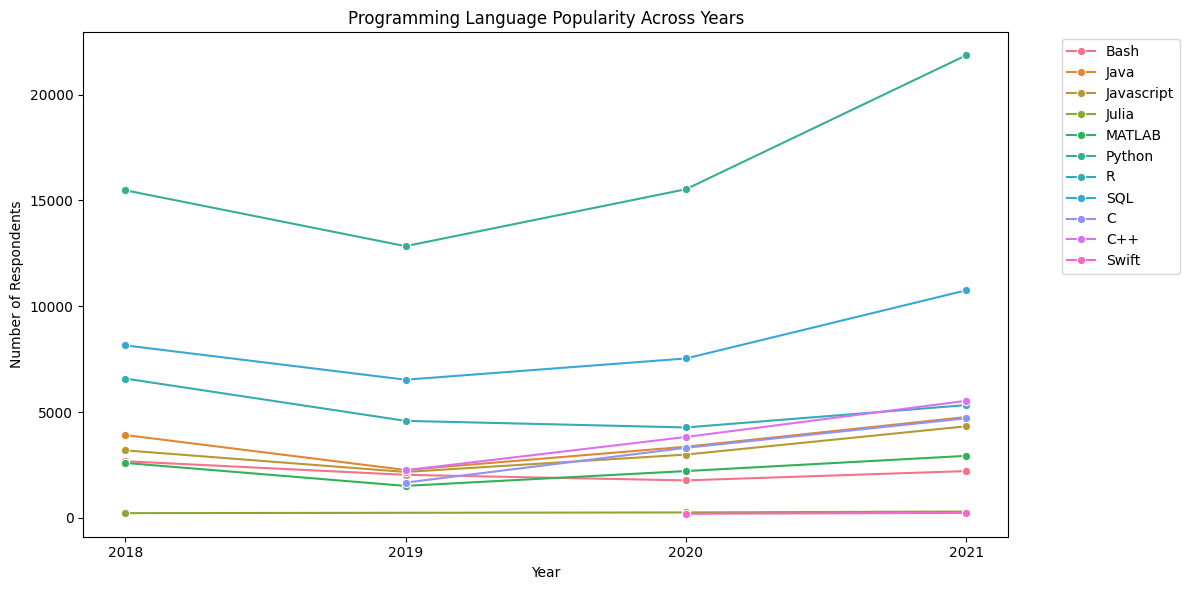

In [229]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=lang_counts, x='Year', y='Count', hue='Language', marker='o')
plt.title('Programming Language Popularity Across Years')
plt.ylabel('Number of Respondents')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h2>Top Countries Taking the Survey (by number of respondents)</h2>

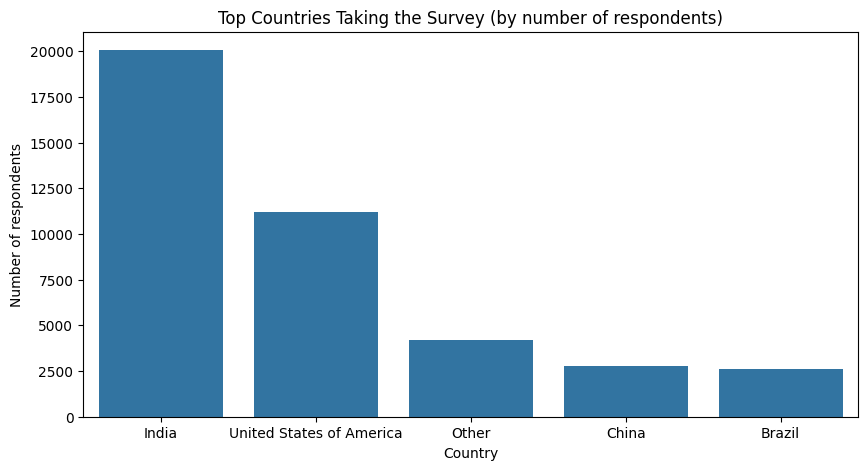

In [230]:
country_count = df['In which country do you currently reside?'].value_counts()[0:5]
plt.figure(figsize=(10,5))
sns.barplot(data=country_count)
plt.title('Top Countries Taking the Survey (by number of respondents)')
plt.xlabel('Country')
plt.ylabel('Number of respondents')
plt.show()

<h2>Educational Level of Respondents</h2>

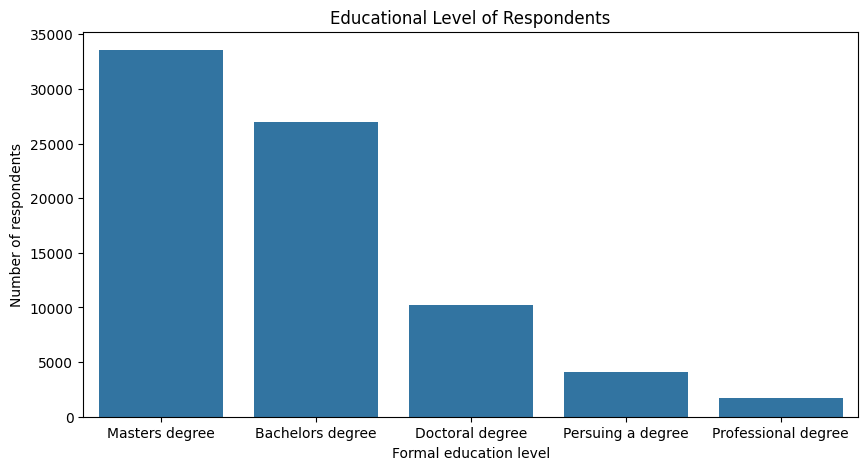

In [231]:
country_count = df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts()[0:5]
plt.figure(figsize=(10,5))
sns.barplot(data=country_count)
plt.title('Educational Level of Respondents')
plt.xlabel('Formal education level')
plt.ylabel('Number of respondents')
plt.show()

<h2>Current Role of Respondents (Employment)</h2>

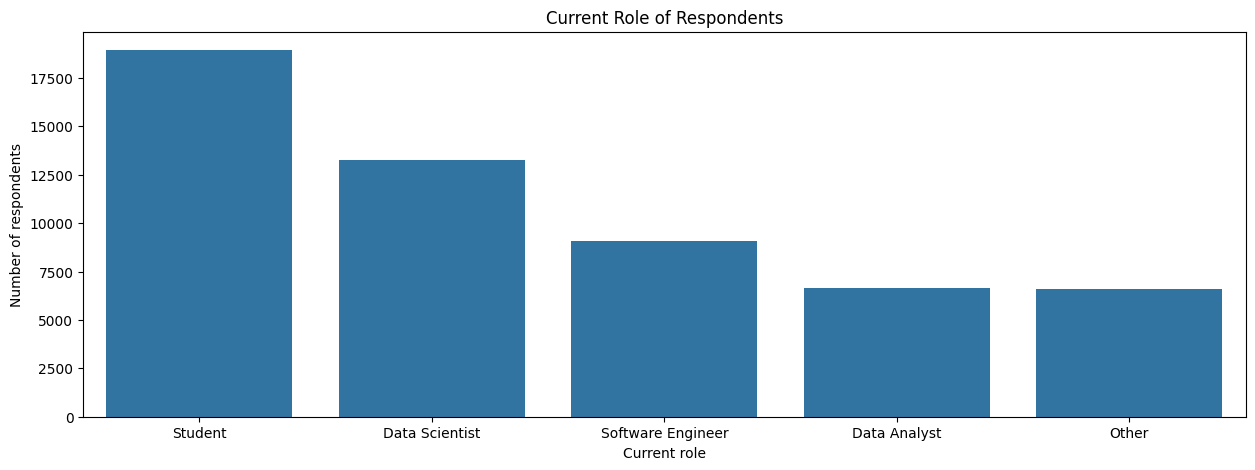

In [232]:
role_count = df['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts()[:5]
plt.figure(figsize=(15,5))
sns.barplot(data=role_count)
plt.ylabel('Number of respondents')
plt.xlabel('Current role')
plt.title('Current Role of Respondents')
plt.show()

<h2>Experience Level with Programming of Respondents</h2>

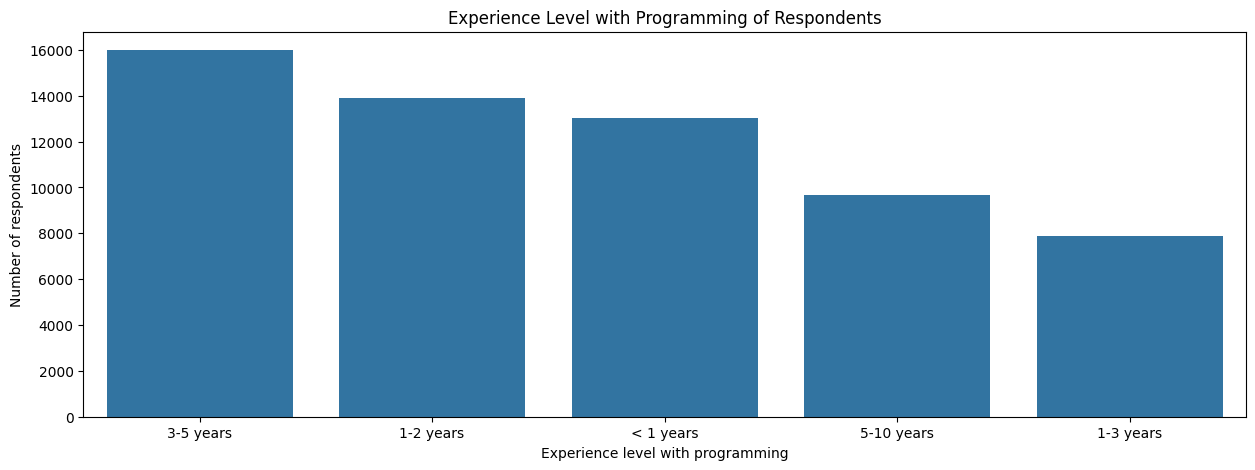

In [233]:
programming_time_count = df['For how many years have you been writing code and/or programming?'].value_counts()[:5]
plt.figure(figsize=(15,5))
sns.barplot(data=programming_time_count)
plt.ylabel('Number of respondents')
plt.xlabel('Experience level with programming')
plt.title('Experience Level with Programming of Respondents')
plt.show()

<h2>Top Five Insights</h2>
<ol>
    <li>Most Popular IDE</li>
    <li>Most Popular Notebook Platforms</li>
    <li>Most Popular Data Sources</li>
    <li>Most Popular Learning Resources</li>
    <li>Most Popular Cloud Platforms</li>
</ol>

We'll create <code>matplotlib</code> subplots of the above and display them in a single cell. The process is similar to the DataFrame melting we did above when plotting the programming language trends across years.

In [234]:
%matplotlib inline
fig, axes = plt.subplots(5, 1, figsize=(30, 100))
plt.close(fig)

In [235]:
IDE_cols = list(df.columns)[22:33]
df_melted = df.melt(id_vars='Year', 
                    value_vars=IDE_cols, 
                    var_name='IDE', 
                    value_name='Used')

df_melted = df_melted[df_melted['Used'] == 1]
IDE_counts = df_melted.groupby(['Year', 'IDE']).size().reset_index(name='Count')
IDE_counts['IDE'] = IDE_counts['IDE'].str.replace('Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice - ', '')
sns.barplot(data=IDE_counts, x='Year', y='Count', hue='IDE', ax=axes[0])
axes[0].set_title('Most Popular IDE (by Year)')

Text(0.5, 1.0, 'Most Popular IDE (by Year)')

In [236]:
notebook_cols = list(df.columns)[33:47]
df_melted = df.melt(id_vars='Year', 
                    value_vars=notebook_cols, 
                    var_name='Notebook', 
                    value_name='Used')

df_melted = df_melted[df_melted['Used'] == 1]
notebook_counts = df_melted.groupby(['Year', 'Notebook']).size().reset_index(name='Count')
notebook_counts['Notebook'] = notebook_counts['Notebook'].str.replace('Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - ', '')
sns.barplot(data=notebook_counts, x='Year', y='Count', hue='Notebook', ax=axes[1])
axes[1].set_title('Most Popular notebook (by Year)')

Text(0.5, 1.0, 'Most Popular notebook (by Year)')

In [237]:
source_cols = list(df.columns)[216:228]
df_melted = df.melt(id_vars='Year', 
                    value_vars=source_cols, 
                    var_name='Source', 
                    value_name='Used')

df_melted = df_melted[df_melted['Used'] == 1]
source_counts = df_melted.groupby(['Year', 'Source']).size().reset_index(name='Count')
source_counts['Source'] = source_counts['Source'].str.replace('Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - ', '')
sns.barplot(data=source_counts, x='Year', y='Count', hue='Source', ax=axes[2])
axes[2].set_title('Most Popular Data Source (by Year)')

Text(0.5, 1.0, 'Most Popular Data Source (by Year)')

In [238]:
learning_cols = list(df.columns)[203:215]
df_melted = df.melt(id_vars='Year', 
                    value_vars=learning_cols, 
                    var_name='Source', 
                    value_name='Used')

df_melted = df_melted[df_melted['Used'] == 1]
learning_counts = df_melted.groupby(['Year', 'Source']).size().reset_index(name='Count')
learning_counts['Source'] = learning_counts['Source'].str.replace('On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - ', '')
sns.barplot(data=learning_counts, x='Year', y='Count', hue='Source', ax=axes[3])
axes[3].set_title('Most Popular Learning Resource (by Year)')

Text(0.5, 1.0, 'Most Popular Learning Resource (by Year)')

In [239]:
cloud_cols = list(df.columns)[122:134]
df_melted = df.melt(id_vars='Year', 
                    value_vars=cloud_cols, 
                    var_name='Platform', 
                    value_name='Used')

df_melted = df_melted[df_melted['Used'] == 1]
cloud_counts = df_melted.groupby(['Year', 'Platform']).size().reset_index(name='Count')
cloud_counts['Platform'] = cloud_counts['Platform'].str.replace('Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - ', '')
sns.barplot(data=cloud_counts, x='Year', y='Count', hue='Platform', ax=axes[4])
axes[4].set_title('Most Popular Cloud Platform (by Year)')

Text(0.5, 1.0, 'Most Popular Cloud Platform (by Year)')

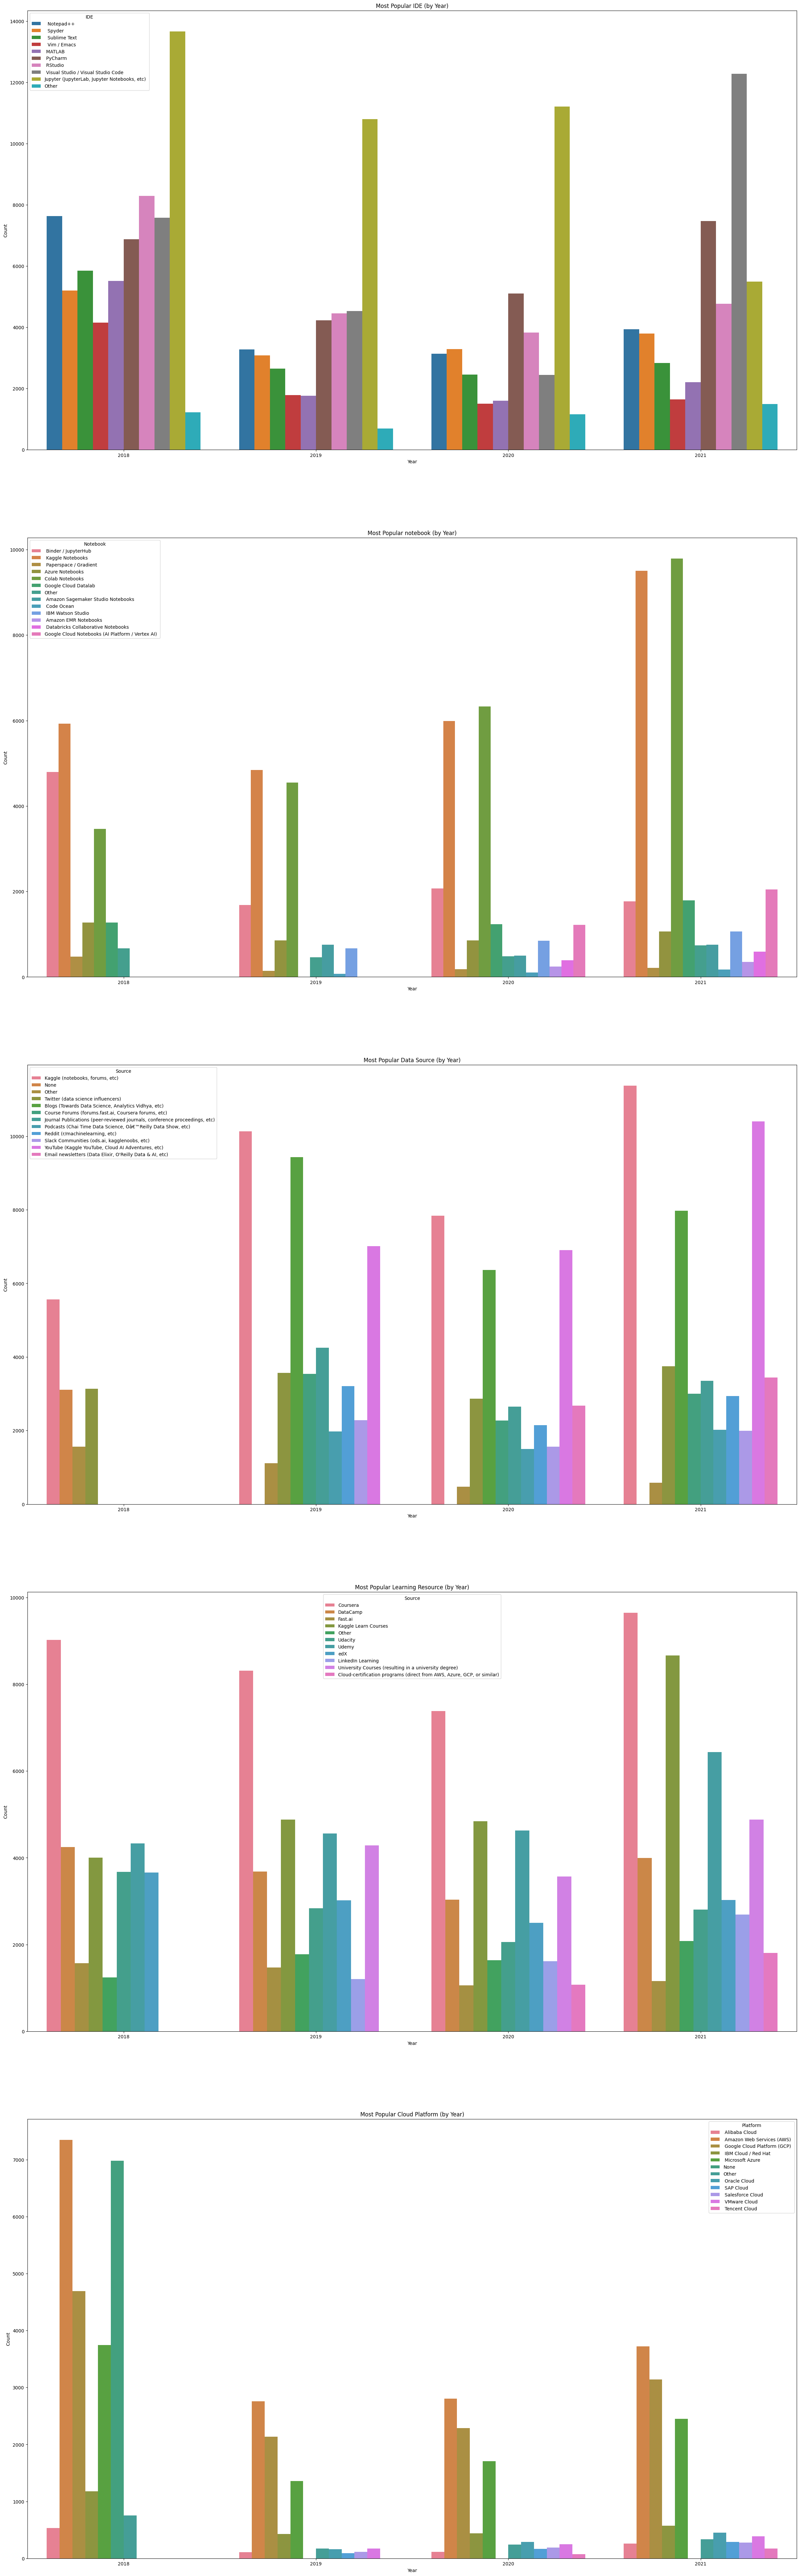

In [240]:
fig